---
a) Berechnen Sie die Wahrscheinlichkeit, dass ein besoffener Barbesucher nach
1000 Schritten der Grösse 1 m zuhause ankommt, wenn sein Haus 1 km vom
Lokal entfernt ist. Der Besoffene ist so besoffen, dass Sie die Wahrscheinlichkeit,
dass er einen Schritt nach rechts macht, gleich gross wie die Wahrscheinlichkeit,
dass er einen Schritt nach links macht, wählen dürfen.

In [1]:
import scipy.stats as st

st.binom.pmf(k=1000, n=1000, p=0.5)

9.332636185032827e-302

In [2]:
# gleich wie
0.5**1000

9.332636185032189e-302

---
b) Die Position $M_N$ nach $N$ Schritten ist dann gegeben durch

$$M_N = X − (N − X)$$

wobei $X$ die Anzahl Schritte nach rechts und $(N − X)$ die Anzahl Schritte nach
links bezeichnet. Wie gross ist die mittlere Position? Wie gross ist die quadratisch
gemittelte Verschiebung $(≡ \sqrt{E[M^2_N]})$, die unser Besoffener nach 1000 Schritten
zurückgelegt hat?

Der erwartungswert der Binomialverteilung $E[X] = N\pi = 1000 \cdot 0.5 = 500$. Da die normale verteilung (was auch intuitiv der fall ist) 0 ist. Also ich mache einen schritt nach rechts und einen nach links also bin ich am schluss wieder bei 0. Da wir uns aber in einem zweidimensionalen Raum befinden muessen wir die mittlere quadratische verschiebung berechnen $\sqrt{E[M^2_N]}$:

$$\sqrt{E[M^2_N]} = \sqrt{E[(X - (N - X))^2]} = \sqrt{4E[X^2]-4E[X]N+N^2}$$

Nun wollen wir $E[X^2]$ bestimmen, dies kann durch die rechenregel $\text{Var}(X) = E[X^2] - E[X]^2$ (wir nehmen die Varianz der Binominalverteilung):

$$\text{Var}(X) = N \cdot \pi \cdot q = E[X^2] - E[X]^2 - E[X^2] - (N \cdot \pi)^2$$

Somit erhalten wir"
$$E[X^2] = N \cdot \pi \cdot q + N^2\pi^2$$

**⚠** fuer $N \cdot \pi \cdot q$ koennen wir auch $N \cdot \pi^2$ schreiben da $\pi = q = 0.5$

Jetzt koennen wir $E[X^2] = N \cdot \pi^ + N^2\pi^2$ einsetzten:

$$\sqrt{E[M^2_N]} = \sqrt{4(N\pi^2+N^2\pi^2)+N^2-4N^2\pi}$$

Hier muessen wir sehen, dass wir nun $\pi = 0.5$ einsetzten und wir erhalten:

$$\sqrt{E[M^2_N]} = \sqrt{N} - \sqrt{1000} = 31.6$$

Die quadratische verschiebung sagt nun aus dass wir nicht 0 meter vom startpunkt weg sind (eindimensional) sondern 31.6 meter (zweidimensional).

c) Wir betrachten wiederum einen betrunkenen Spaziergänger, der an einem Punkt
$x_0$ in einer engen langen Gasse seinen Heimweg antritt. Er setzt seinen Fuss
eine Schrittweite $X_1$ von $x_0$ entfernt hin (entweder links oder rechts von $x_0$).
Wir fassen $X_1$ als eine normal-verteilte Zufallsvariable mit Erwartungswert µ
und Standardabweichung σ auf; somit ist die Position des Spaziergängers nach
einem Schritt ebenfalls eine Zufallsvariable und gegeben durch:

$$S(1) = x_0 + X_1$$.

Nach einem weiteren Schritt der Länge $X_2$ mit demselben Erwartungswert µ
und Standardabweichung σ ist die Position des Spaziergängers $S(2) = x_0 +
X_1 + X_2$. Nach $N$ Schritten ist die Position gegeben durch:

$$S(N) = x_0 + \sum_{i=1}^N X_i$$

Bestimmen Sie den Erwartungswert und die Varianz der Position des betrunkenen Spaziergängers nach $N = 1000$ Schritten, also $E[S(N)]$ und $\text{Var}[S(N)]$,
wobei $x_0 = 0, µ = 0$ und $σ = 1$ seien. Wie interpretieren Sie den Erwartungswert
und die Varianz von $S(N)$?

Der Startpunkt ist $x_0 = 0$ also ist dieser immer vernachlaessigbar. Wir haben eine Normalverteilung von:

$$N(0, 1^2)$$

Da wir N schritte machen haben wir N mal den erwartungswert:

$$E[S(N))] = N\mu = 0$$

Das selbe gilt fuer die Varianz:

$$\text{Var}(S(N)) = N\sigma^2 = 1000$$



---
d) Das Beispiel des betrunkenen Spaziergängers ist ein Beispiel für einen (eindimensionalen) Random Walk. Wenn ein Aktienkurs als Random Walk beschrieben
wird, dann ist die kurzzeitige Entwicklung des Aktienwertes zufällig und nicht
vorhersagbar (siehe dazu die Hypothese effizienter Märkte). In untenstehender
Abbildung ist der S&P 500 Kurs (Aktienkurs von 500 führenden Unternehmen)
vom Jahre 2012 - bestehend aus 251 Tagen - aufgezeichnet

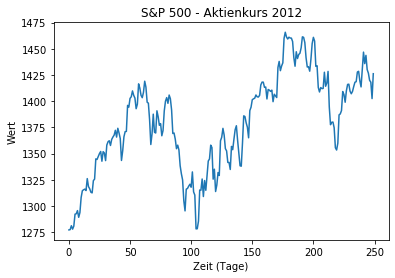

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np

sp2012 = pd.read_table('sp2012.txt')
df = DataFrame(sp2012)
plt.plot(df)
plt.xlabel("Zeit (Tage)")
plt.ylabel("Wert")
plt.title('S&P 500 - Aktienkurs 2012')
plt.show()

Der Werteverlauf von S&P 500 während 2012 beginnt bei einem Wert von 1257.6,
die mittlere Schrittweite beträgt 0.483 und die Standardabweichung der 250
Schrittweiten beträgt 11. Simulieren Sie den Werteverlauf als einen Random
Walk, indem Sie annehmen, dass die Schrittweiten normal-verteilte Zufallsvariablen mit µ = 0.483 und σ = 11 sind.

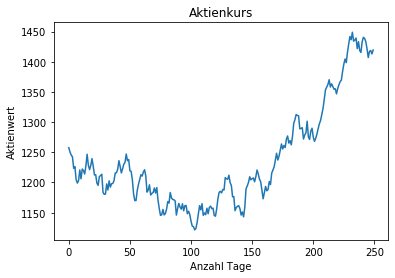

In [11]:
import scipy.stats as st

np.random.seed(1337)

mu = 0.483
sigma = 11
start_value = 1257.6

steps = np.array(
    st.norm(mu, sigma).rvs(250)
)
sp_simulated = np.empty([250])
sp_simulated[0] = start_value

for i in range(249):
    sp_simulated[i+1] = sp_simulated[i]+ steps[i]

plt.plot(sp_simulated)
plt.xlabel("Anzahl Tage")
plt.ylabel("Aktienwert")
plt.title('Aktienkurs')
plt.show()